### **Chapter 02. SGDClassifier**

In [1]:
import pandas as pd

fish = pd.read_csv("Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
print(fish.columns)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [3]:
x = fish[['Weight', 'Length2', 'Length3', 'Height', 'Width']].to_numpy()
print(type(x))

<class 'numpy.ndarray'>


In [4]:
y = fish['Species'].to_numpy()
print(type(y))

<class 'numpy.ndarray'>


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print(x_train.shape, y_train.shape)   # 75%
print(x_test.shape, y_test.shape)     # 25%

(119, 5) (119,)
(40, 5) (40,)


In [6]:
# 전처리 -> Feature Scaling -> 표준화, 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()

ss.fit(x_train)   # ---> 평균, 표준편차를 계산함!

x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [7]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)

sc.fit(x_train_scaled, y_train)

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.7899159663865546
시험용: 0.775


/Users/manggee/Code/dongduk/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
# 11번째 에포크

sc.partial_fit(x_train_scaled, y_train)   # 1 epoch만큼 학습시켜줌!

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.8067226890756303
시험용: 0.8


In [9]:
# 12번째 에포크

sc.partial_fit(x_train_scaled, y_train)   # 1 epoch만큼 학습시켜줌!

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.8235294117647058
시험용: 0.9


In [10]:
# 13번째 에포크

sc.partial_fit(x_train_scaled, y_train)   # 1 epoch만큼 학습시켜줌!

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.8739495798319328
시험용: 0.875


In [11]:
import numpy as np

print(np.unique(y_train))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
import numpy as np

sc = SGDClassifier(loss="log_loss", random_state=42)

train_score = []
test_score = []
for _ in range(0, 300, 1):
    sc.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train)) 
    train_score.append(sc.score(x_train_scaled, y_train))
    test_score.append(sc.score(x_test_scaled, y_test))

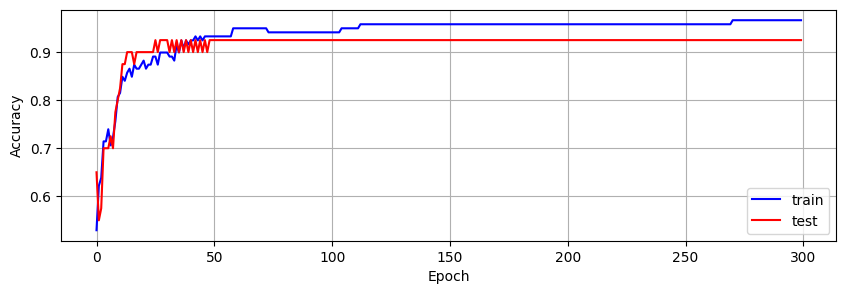

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(train_score, label="train", c="blue")
plt.plot(test_score, label="test", c="red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
# tolerance : 관용

sc.fit(x_train_scaled, y_train)

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.957983193277311
시험용: 0.925


In [15]:
sc = SGDClassifier(loss="log_loss", max_iter=2000, tol=None, 
                   early_stopping=True,
                   random_state=42)
# tolerance : 관용

sc.fit(x_train_scaled, y_train)

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.9663865546218487
시험용: 0.925


In [16]:
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None, random_state=42)
# tolerance : 관용

sc.fit(x_train_scaled, y_train)

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.9495798319327731
시험용: 0.925
